In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

## 1. Load and explore the dataset. 

In [2]:
cirrhosis = pd.read_csv('cirrhosis.csv')
pd.options.display.max_columns = None
#Glimpse of Data
cirrhosis.head(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [3]:
df = cirrhosis.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

we can see above this dataset contain 418 rows and 20 columns and have some missing values in it.
we will move ahead and then we will do some preprocessing steps.

In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


we can see above ID columns does not contain any specific information it just hold indexing values so we will drop it.


Minimum Number of days are 41 and maximum is 4795 and average is 2613.


here age is in the form of number of days so minimum age is 9598 maximum age is 28650 and average age is 21272.


vice versa.




In [6]:
df.drop('ID',axis=1,inplace=True)

In [7]:
df.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


we have dropped ID column.

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(418, 19)


there is no duplicate values.

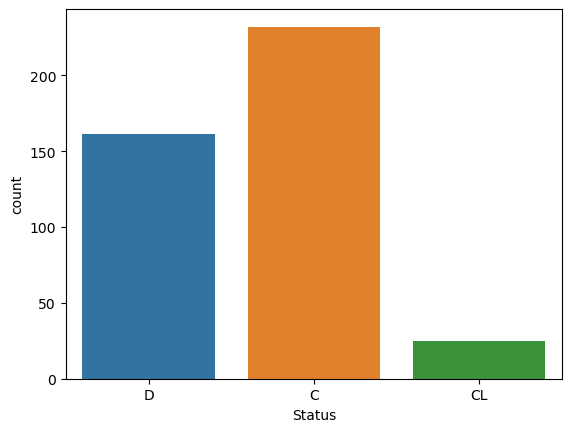

In [9]:
sns.countplot(data=df,x = df['Status'])
plt.show()

In [10]:
df['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

we can see above graph and count of 'status' column D =(death),C=(censored),CL = (censored due to liver transplantation)

<Axes: xlabel='Status', ylabel='Stage'>

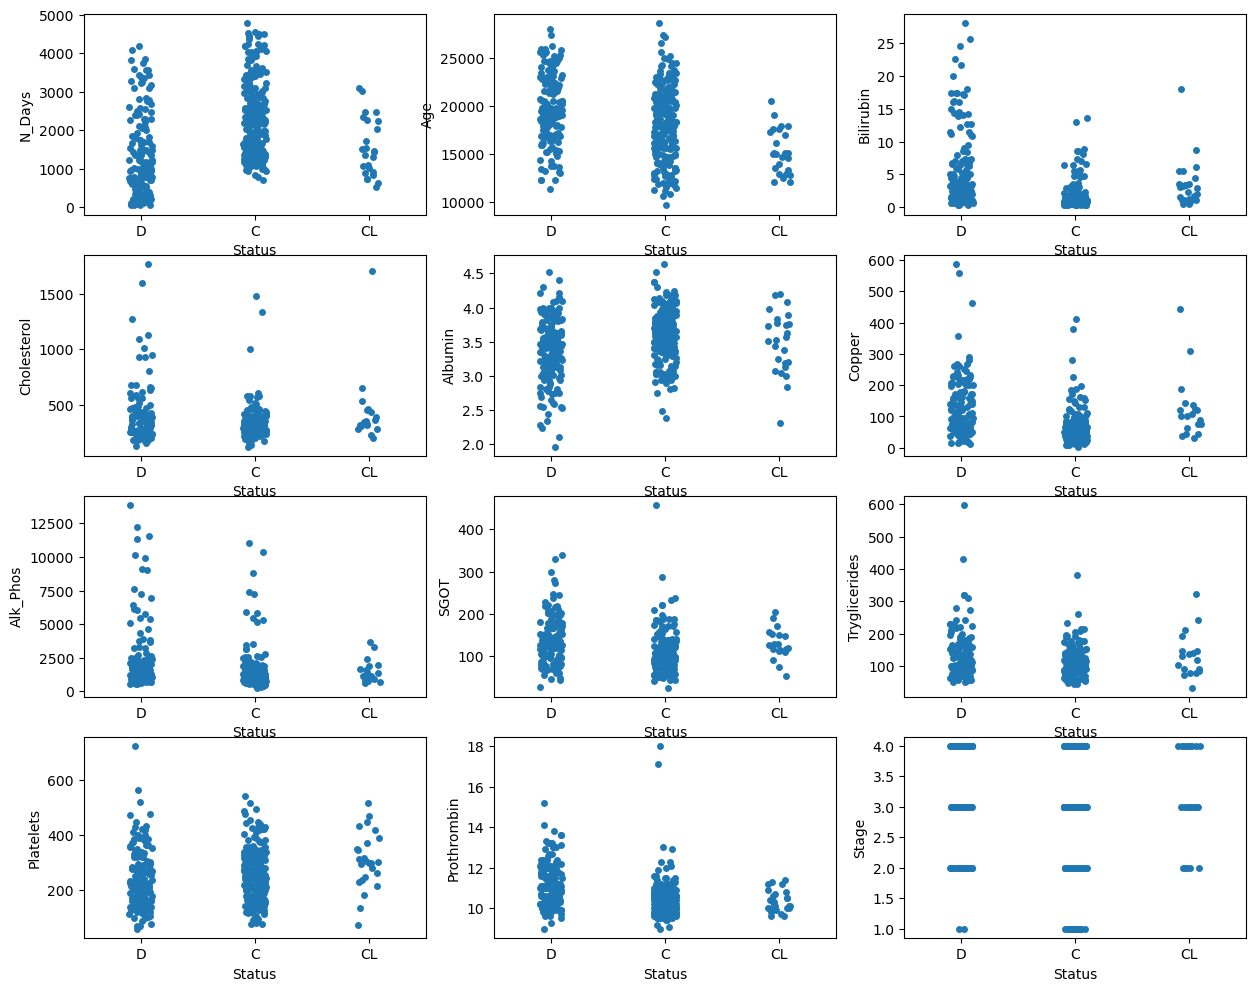

In [11]:
## Display distribution of data points of each class in each attribute
plt.figure(figsize=(15,12))
plt.subplot(4,3,1)
sns.stripplot(x = 'Status', y = 'N_Days', data = df, jitter = True)
plt.subplot(4,3,2)
sns.stripplot(x = 'Status', y = 'Age', data = df, jitter = True)
plt.subplot(4,3,3)
sns.stripplot(x = 'Status', y = 'Bilirubin', data = df, jitter = True)
plt.subplot(4,3,4)
sns.stripplot(x = 'Status', y = 'Cholesterol', data = df, jitter = True)
plt.subplot(4,3,5)
sns.stripplot(x = 'Status', y = 'Albumin', data = df, jitter = True)
plt.subplot(4,3,6)
sns.stripplot(x = 'Status', y = 'Copper', data = df, jitter = True)
plt.subplot(4,3,7)
sns.stripplot(x = 'Status', y = 'Alk_Phos', data = df, jitter = True)
plt.subplot(4,3,8)
sns.stripplot(x = 'Status', y = 'SGOT', data = df, jitter = True)
plt.subplot(4,3,9)
sns.stripplot(x = 'Status', y = 'Tryglicerides', data = df, jitter = True)
plt.subplot(4,3,10)
sns.stripplot(x = 'Status', y = 'Platelets', data = df, jitter = True)
plt.subplot(4,3,11)
sns.stripplot(x = 'Status', y = 'Prothrombin', data = df, jitter = True)
plt.subplot(4,3,12)
sns.stripplot(x = 'Status', y = 'Stage', data = df, jitter = True)

we can see NDays and status graph number of days is less in Death condition but for C number of days are starting some where around 1000 and its dense means patients more belongs to this status and for CL its very less means its a rare type of case.

vice versa every graph contain much information well they do not asked me about EDA so i am not going in depth.

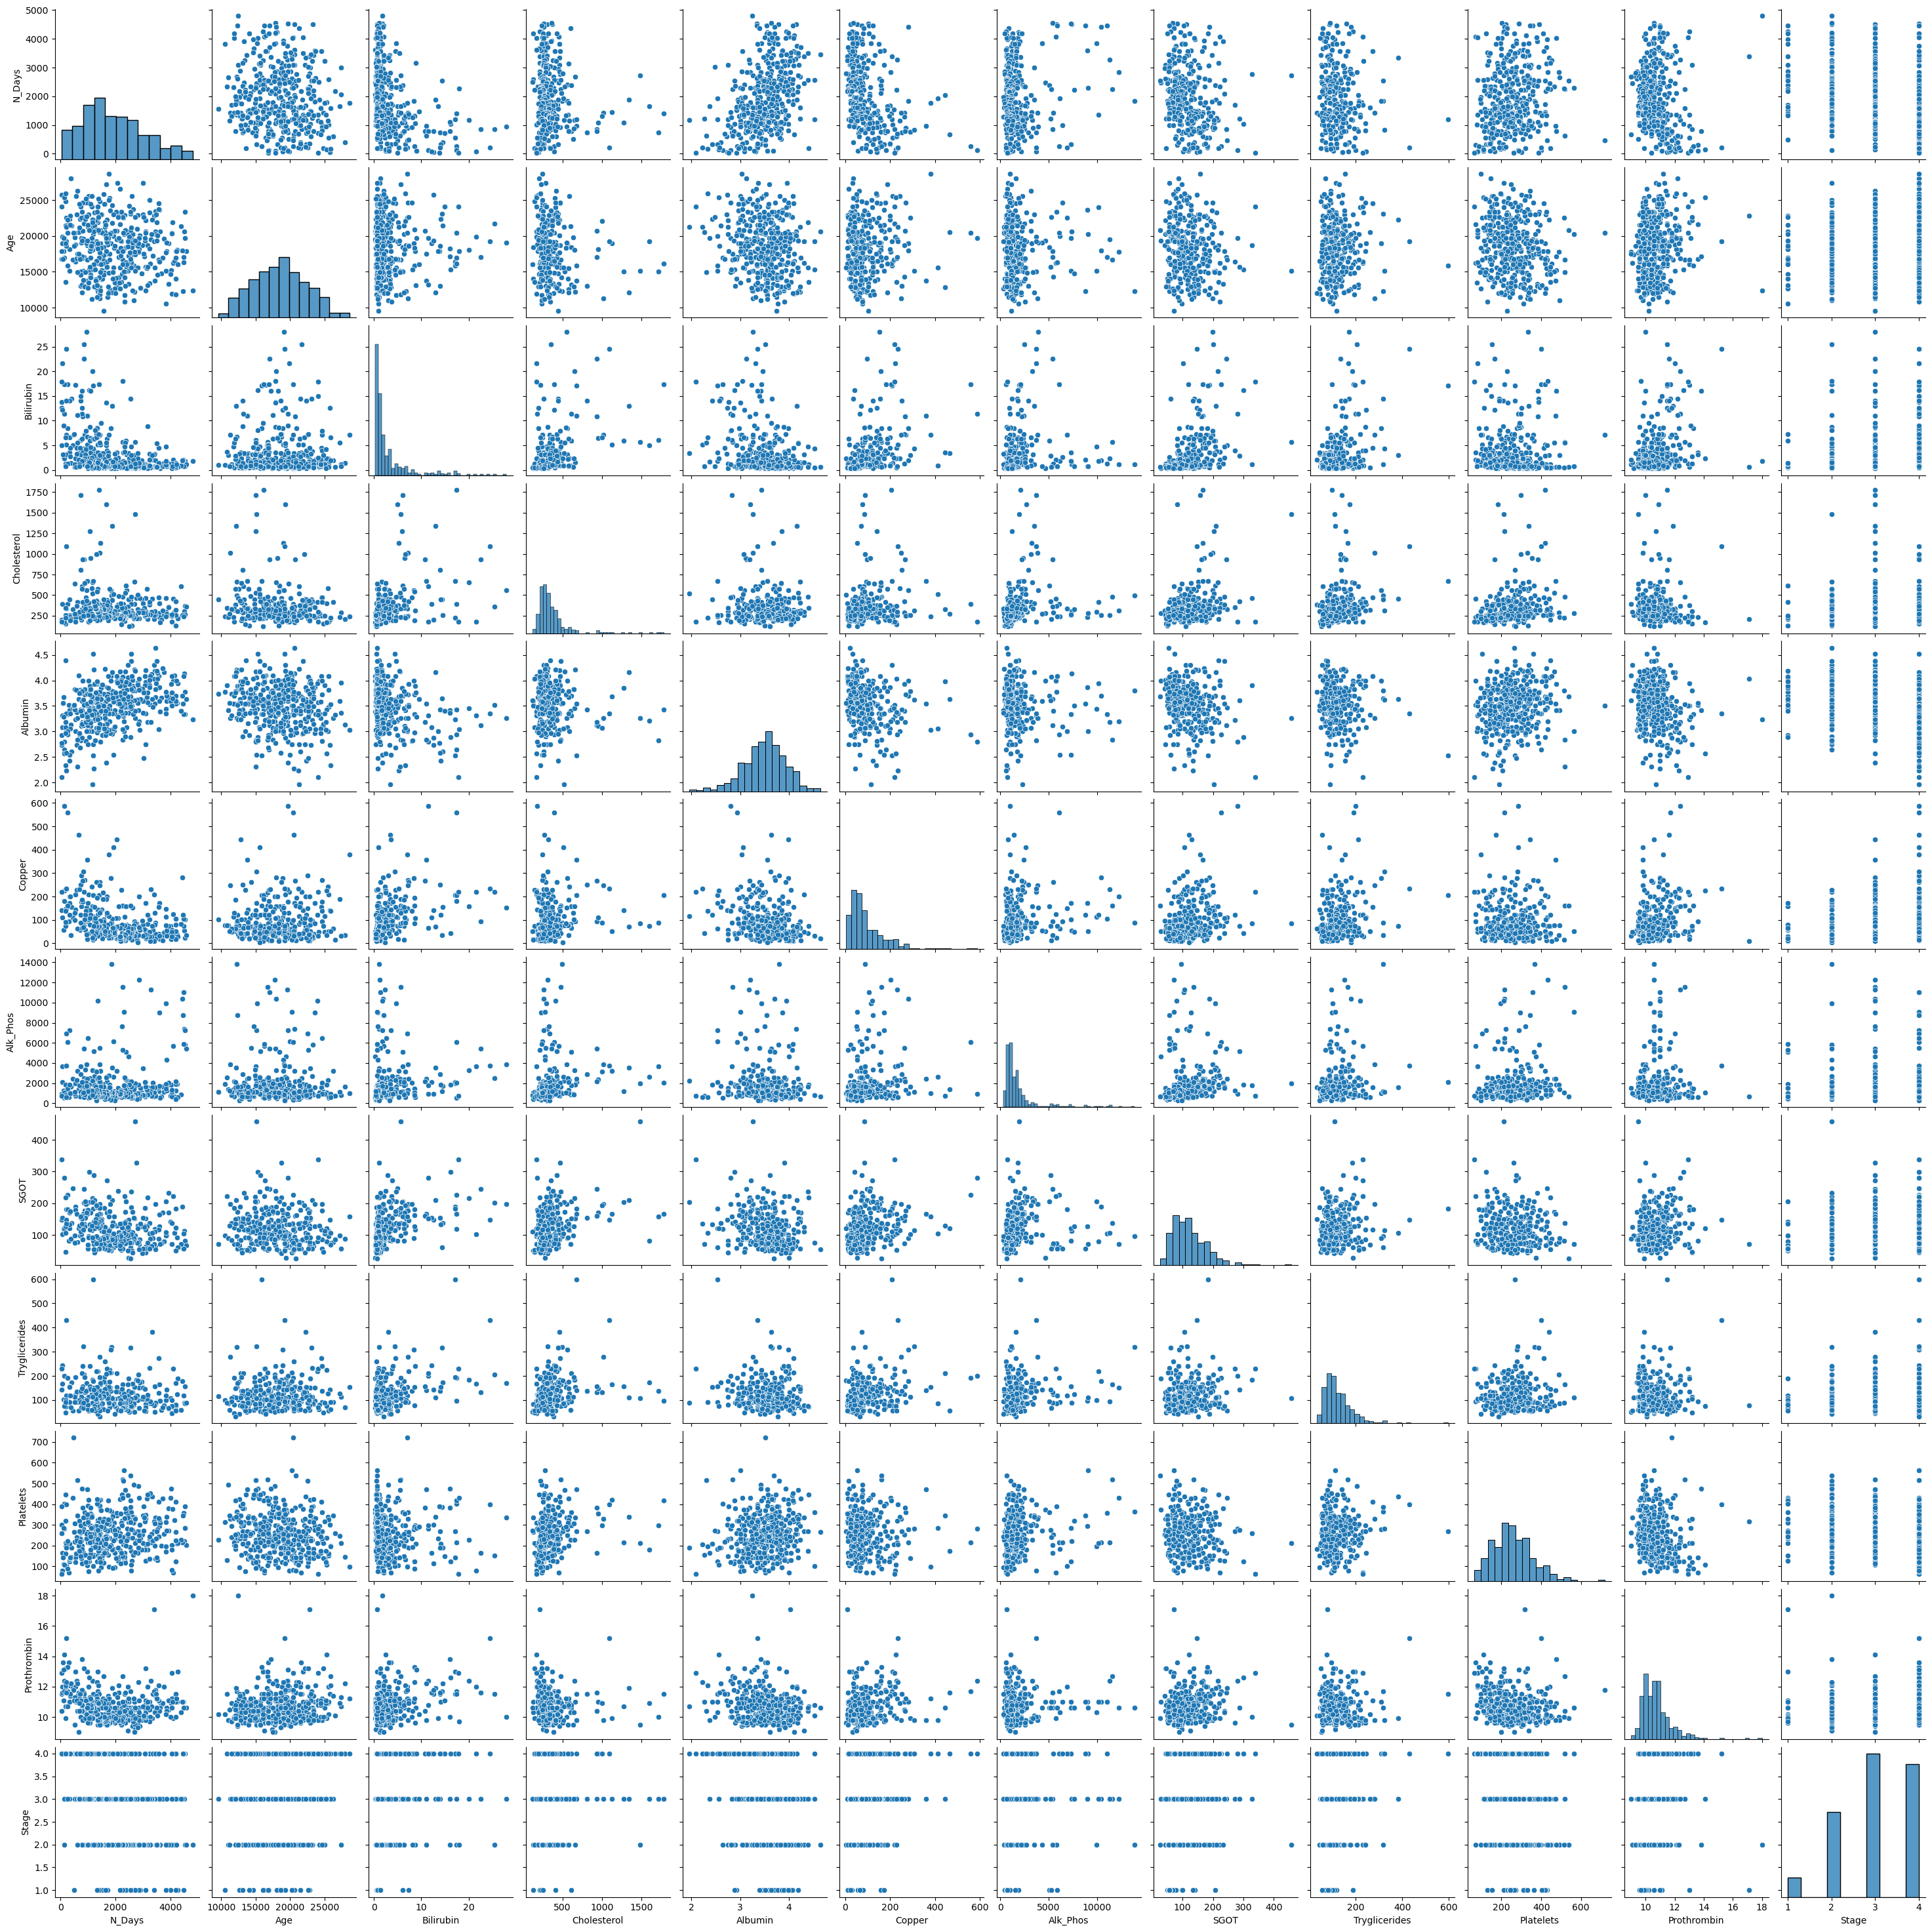

In [12]:
sns.pairplot(data=df);

In [13]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 418 
The number of columns (variables) is 19


In [14]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(df[feature].value_counts())
        print('\n')

Status
C     232
D     161
CL     25
Name: count, dtype: int64


Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64


Sex
F    374
M     44
Name: count, dtype: int64


Ascites
N    288
Y     24
Name: count, dtype: int64


Hepatomegaly
Y    160
N    152
Name: count, dtype: int64


Spiders
N    222
Y     90
Name: count, dtype: int64


Edema
N    354
S     44
Y     20
Name: count, dtype: int64




we can see above Count of all categorical features.

In [15]:
for feature in df.columns: 
    if df[feature].dtype != 'object': 
        print(df[feature].value_counts())
        print('\n')

N_Days
1434    2
3445    2
1216    2
1329    2
1067    2
       ..
2990    1
3098    1
3150    1
3149    1
976     1
Name: count, Length: 399, dtype: int64


Age
19724    7
18993    6
18628    6
23376    5
22646    5
        ..
15574    1
19295    1
18713    1
20256    1
12784    1
Name: count, Length: 344, dtype: int64


Bilirubin
0.7     33
0.6     31
0.5     23
0.8     23
1.1     20
        ..
24.5     1
10.8     1
3.7      1
5.9      1
4.6      1
Name: count, Length: 98, dtype: int64


Cholesterol
260.0    4
316.0    4
448.0    4
257.0    3
259.0    3
        ..
486.0    1
528.0    1
458.0    1
950.0    1
576.0    1
Name: count, Length: 201, dtype: int64


Albumin
3.35    11
3.50     8
3.60     8
3.40     7
3.65     7
        ..
3.38     1
2.43     1
3.05     1
1.96     1
3.17     1
Name: count, Length: 154, dtype: int64


Copper
52.0     8
67.0     7
58.0     6
75.0     6
20.0     5
        ..
178.0    1
110.0    1
154.0    1
269.0    1
186.0    1
Name: count, Length: 158, dtype: 

we can see above Count of all numerical features.

In [16]:
df.isin(['#','$','@','*','.','/','&','!']).sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

there is no special character.

#### (a) Use an appropriate method to deal with the missing values for the data set. 

In [17]:
df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

we can see above sum of missing values in each columns.

In [18]:
# Assuming your DataFrame is named 'df'
df.dropna(subset=['Drug'], inplace=True)

I dropped all rows with respect to drug column because it was wriiten on its website page. 

In [19]:
df.isnull().sum()

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

we can see some columns still have some missing values.

In [20]:
print("percentage of missing value:\n",df.isnull().sum()*100/ len(df))

percentage of missing value:
 N_Days           0.000000
Status           0.000000
Drug             0.000000
Age              0.000000
Sex              0.000000
Ascites          0.000000
Hepatomegaly     0.000000
Spiders          0.000000
Edema            0.000000
Bilirubin        0.000000
Cholesterol      8.974359
Albumin          0.000000
Copper           0.641026
Alk_Phos         0.000000
SGOT             0.000000
Tryglicerides    9.615385
Platelets        1.282051
Prothrombin      0.000000
Stage            0.000000
dtype: float64


we can see percentage of missing values are less than 10% so we can impute it

In [21]:

# Assuming your DataFrame is named 'df'
df.fillna(df.select_dtypes(include=["float64", "int64"]).mean(), inplace=True)


I choose here mean values of each column to impute missing values of its columns.

In [22]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

now we can see above after imputation there is no missing values.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         312 non-null    int64  
 1   Status         312 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            312 non-null    int64  
 4   Sex            312 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          312 non-null    object 
 9   Bilirubin      312 non-null    float64
 10  Cholesterol    312 non-null    float64
 11  Albumin        312 non-null    float64
 12  Copper         312 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  312 non-null    float64
 16  Platelets      312 non-null    float64
 17  Prothrombin    312 non-null    float64
 18  Stage          

now we can see above number of rows are 312 and number of columns are 19

**outliers check and treatment**

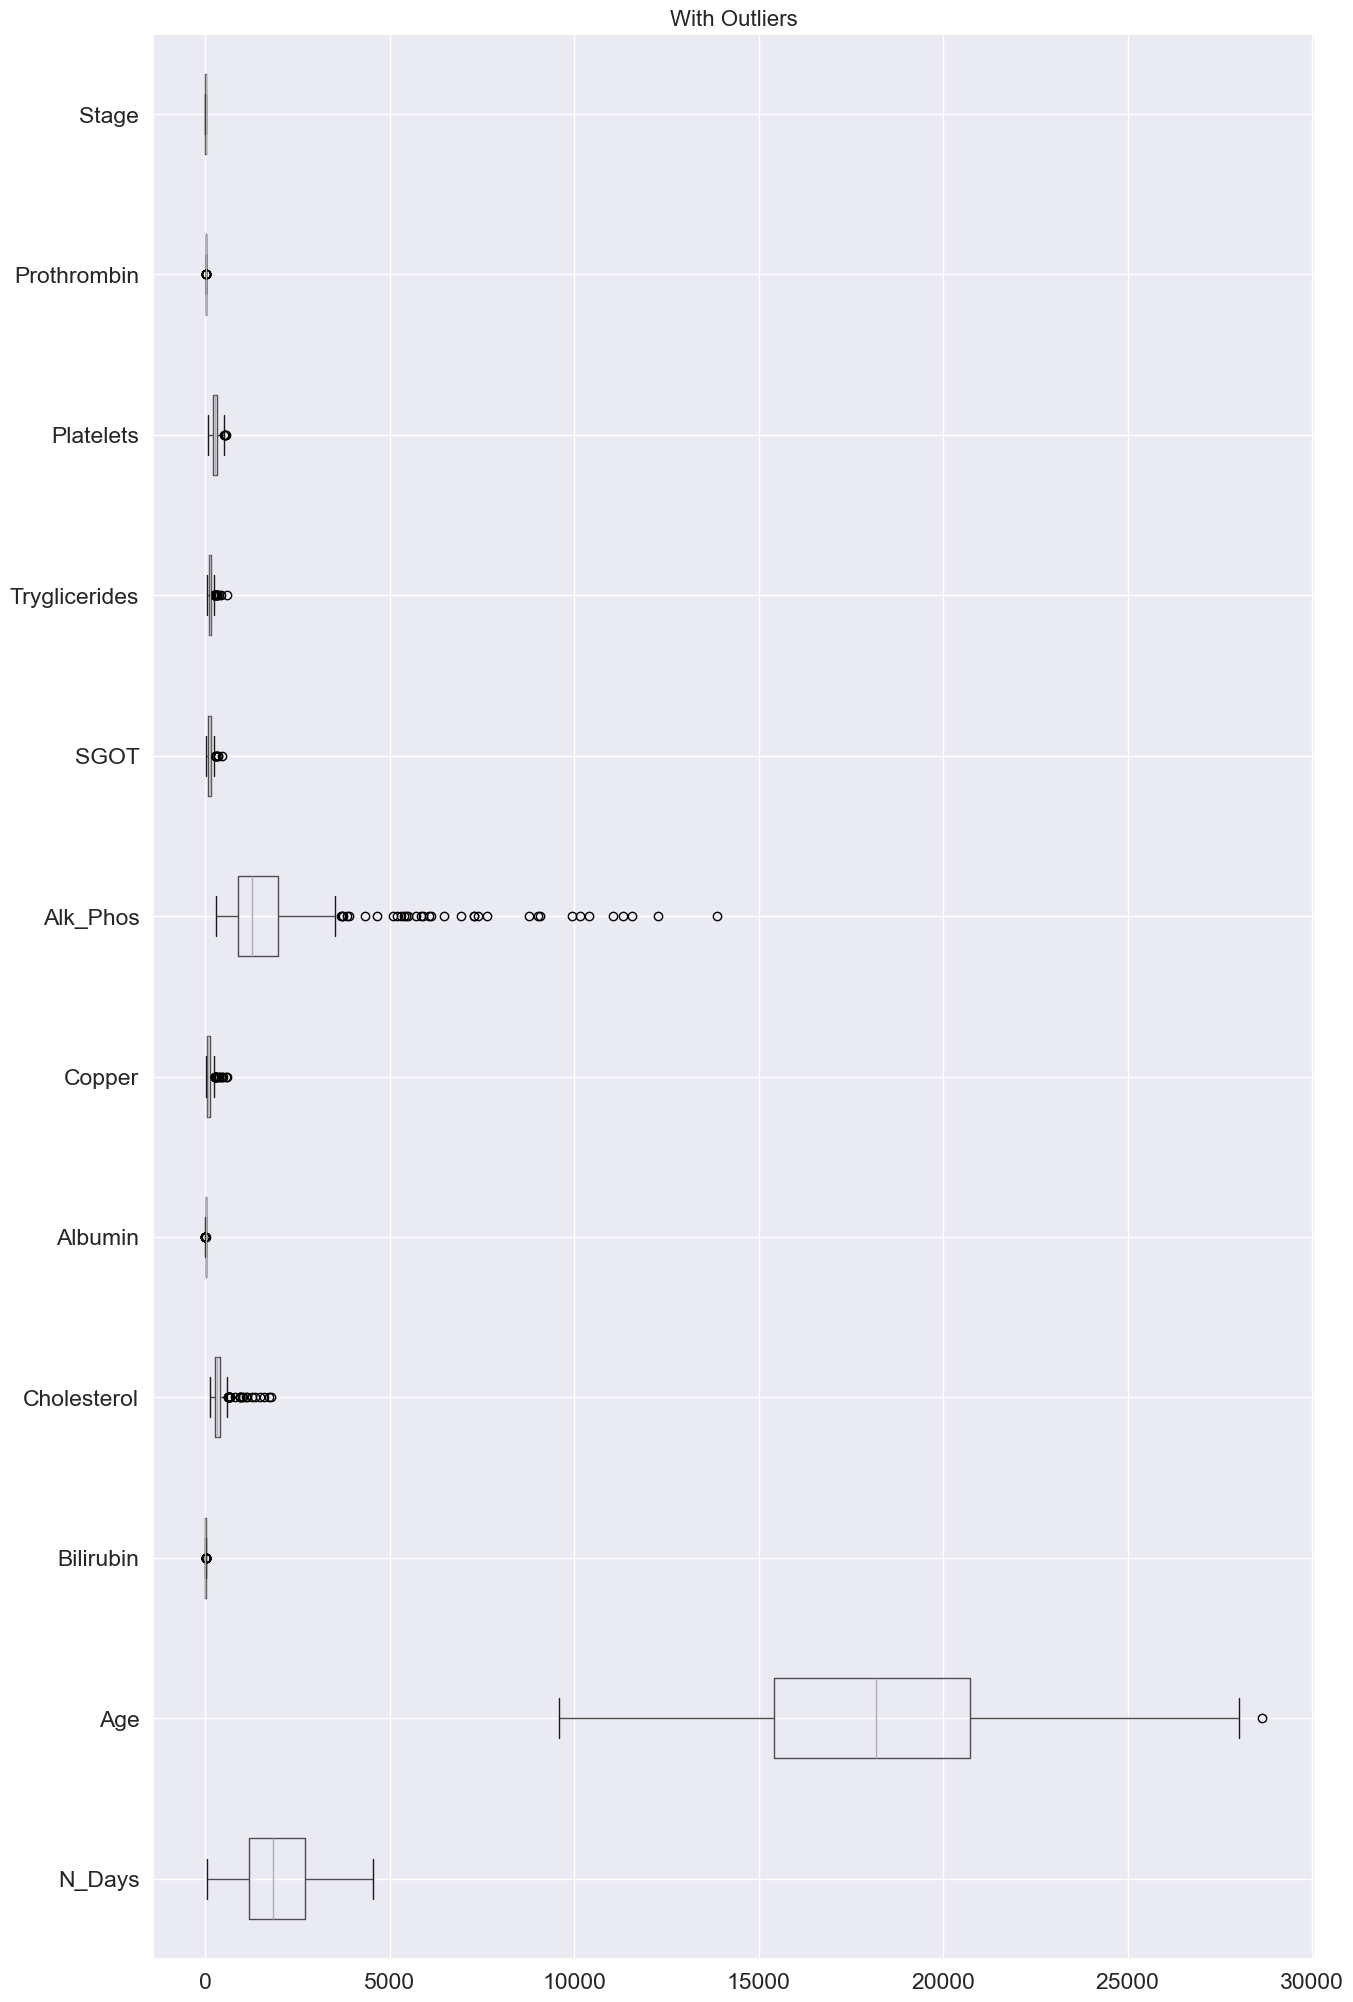

In [24]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(15,25))
sns.set(font_scale=1.5)
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [25]:
# Calculate the upper and lower limits
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
# Removing the outliers
for column in df.select_dtypes(include=["float64", "int64"]):
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

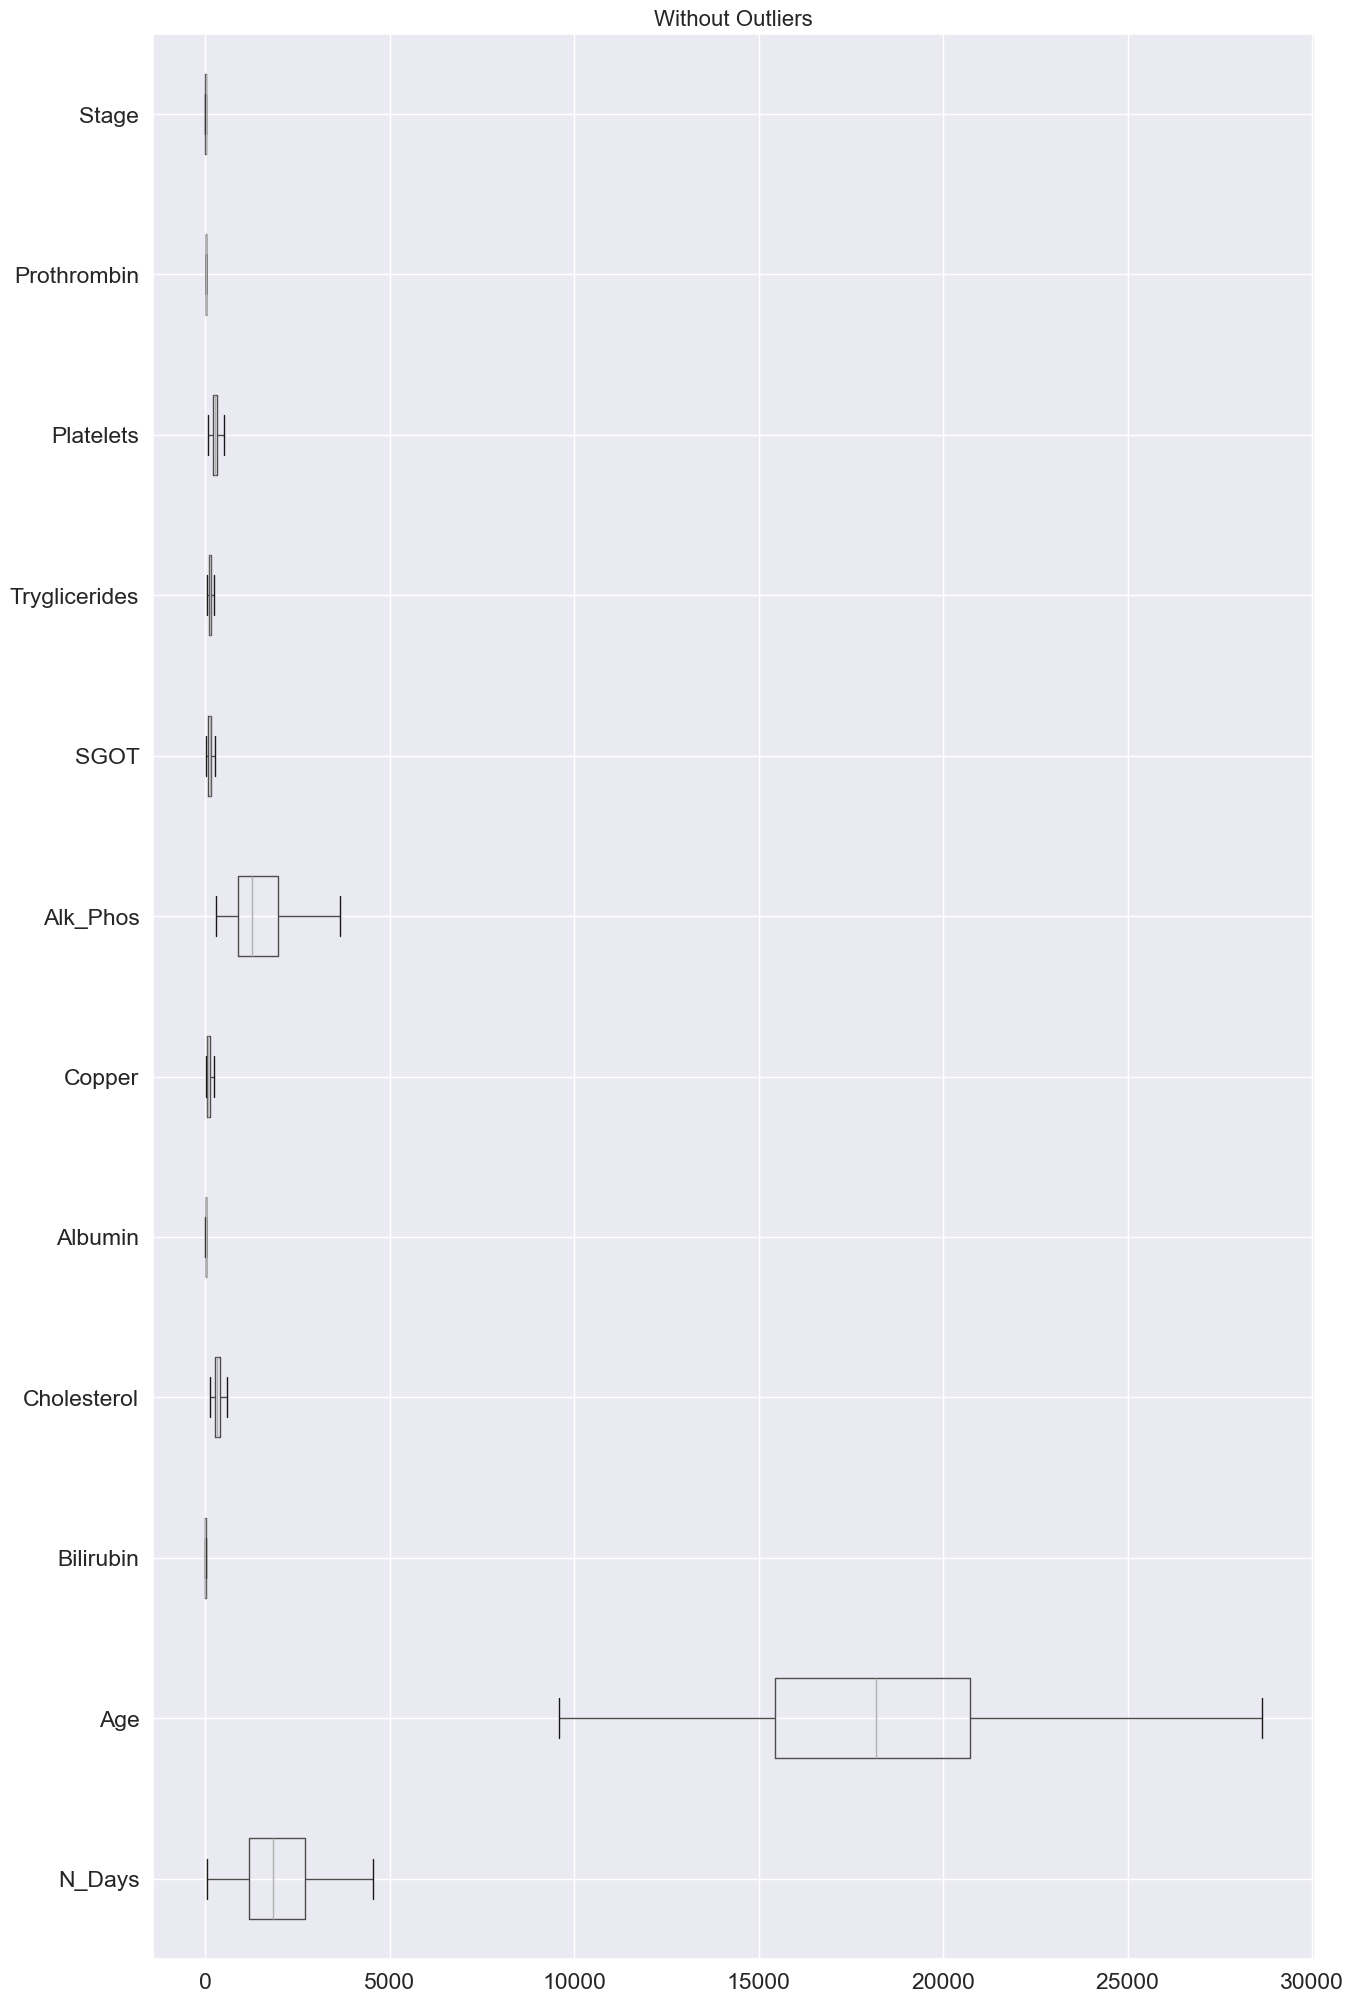

In [27]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(15,25))
sns.set(font_scale=1.5)
df[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

#### b. Split the data set into training and test set with a ratio of  (8:2).

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(['Status'], axis=1)
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [29]:
X_train.head()


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
111,3445.0,Placebo,20256.0,F,N,Y,Y,N,2.0,267.000000,3.67,89.0,754.0,196.85,90.000000,136.0,11.8,4.0
208,2216.0,Placebo,19221.0,F,N,Y,Y,N,0.7,252.000000,4.01,11.0,1210.0,72.85,58.000000,309.0,9.5,2.0
145,2615.0,Placebo,12369.0,F,N,N,N,S,1.2,369.510563,3.89,58.0,1284.0,173.60,124.702128,239.0,9.4,3.0
203,2090.0,Placebo,22857.0,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,281.0,10.2,3.0
78,3707.0,D-penicillamine,16990.0,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,3.0


In [30]:
y_train.head()

111    D
208    C
145    C
203    D
78     C
Name: Status, dtype: object

In [31]:
print("X_train observation and features",X_train.shape)

X_train observation and features (249, 18)


In [32]:
print("y_train observation and features",y_train.shape)

y_train observation and features (249,)


In [33]:
print("X_test observation and features",X_test.shape)

X_test observation and features (63, 18)


In [34]:
print("y_test observation and features",y_test.shape)

y_test observation and features (63,)


#### c. Based on the training and test data, show the feature types and indicate which features are continuous or categorical.

In [35]:
for featureobj in X_train.columns: 
    if X_train[featureobj].dtype == 'object': 
        print(X_train[featureobj].value_counts())
        print('\n')

Drug
D-penicillamine    125
Placebo            124
Name: count, dtype: int64


Sex
F    220
M     29
Name: count, dtype: int64


Ascites
N    228
Y     21
Name: count, dtype: int64


Hepatomegaly
N    129
Y    120
Name: count, dtype: int64


Spiders
N    183
Y     66
Name: count, dtype: int64


Edema
N    213
S     19
Y     17
Name: count, dtype: int64




above are the categorical features based on training data.

In [36]:
for feature in X_train.columns: 
    if X_train[feature].dtype != 'object': 
        print(X_train[feature].value_counts())
        print('\n')

N_Days
3445.0    2
264.0     2
1882.0    2
1216.0    2
1614.0    2
         ..
1295.0    1
191.0     1
1945.0    1
1568.0    1
110.0     1
Name: count, Length: 242, dtype: int64


Age
17841.0    2
22960.0    2
17525.0    2
20256.0    1
12285.0    1
          ..
12120.0    1
24803.0    1
14106.0    1
9598.0     1
17884.0    1
Name: count, Length: 246, dtype: int64


Bilirubin
7.3625    21
0.6000    20
0.7000    16
0.5000    15
0.8000    15
1.1000    14
0.9000    12
1.3000    12
1.0000    12
2.3000     6
0.4000     6
1.4000     5
1.6000     5
2.1000     5
1.2000     5
2.0000     5
3.4000     4
1.8000     4
3.2000     4
1.9000     3
6.4000     3
3.6000     3
3.3000     3
1.5000     3
2.4000     3
4.7000     3
3.5000     3
2.5000     3
4.5000     2
0.3000     2
3.9000     2
6.6000     2
7.1000     2
2.2000     2
5.0000     2
2.9000     2
5.1000     2
7.2000     2
5.2000     1
6.8000     1
5.6000     1
2.8000     1
5.5000     1
2.6000     1
2.7000     1
6.1000     1
6.0000     1
3.0000     

above are the continuous features  based on testing data except 'stage' feature it has descrete data type.

In [37]:
for featureobj in X_test.columns: 
    if X_test[featureobj].dtype == 'object': 
        print(X_test[featureobj].value_counts())
        print('\n')

Drug
D-penicillamine    33
Placebo            30
Name: count, dtype: int64


Sex
F    56
M     7
Name: count, dtype: int64


Ascites
N    60
Y     3
Name: count, dtype: int64


Hepatomegaly
Y    40
N    23
Name: count, dtype: int64


Spiders
N    39
Y    24
Name: count, dtype: int64


Edema
N    50
S    10
Y     3
Name: count, dtype: int64




above are the categorical features based on training data.

In [38]:
for featureobj in X_test.columns: 
    if X_test[featureobj].dtype != 'object': 
        print(X_test[featureobj].value_counts())
        print('\n')

N_Days
348.0     1
2466.0    1
1770.0    1
2357.0    1
2256.0    1
         ..
762.0     1
3933.0    1
1420.0    1
1329.0    1
3422.0    1
Name: count, Length: 63, dtype: int64


Age
16279.0    2
22797.0    1
24101.0    1
25006.0    1
13075.0    1
          ..
22574.0    1
19015.0    1
11872.0    1
18352.0    1
15574.0    1
Name: count, Length: 62, dtype: int64


Bilirubin
7.3625    9
0.5000    5
0.7000    4
1.2000    4
1.1000    3
3.2000    3
0.4000    2
0.9000    2
1.3000    2
3.0000    2
5.7000    2
1.4000    2
0.8000    2
2.1000    2
0.6000    2
6.5000    1
6.3000    1
0.3000    1
4.4000    1
3.1000    1
2.8000    1
3.4000    1
4.5000    1
6.6000    1
1.8000    1
5.6000    1
3.8000    1
1.7000    1
4.0000    1
2.0000    1
5.2000    1
1.9000    1
Name: count, dtype: int64


Cholesterol
597.000000    3
316.000000    3
248.000000    2
244.000000    2
232.000000    2
201.000000    2
369.510563    2
322.000000    1
346.000000    1
298.000000    1
288.000000    1
361.000000    1
280.0000

above are the continuous features  based on testing data except 'stage' feature it has descrete data type.

In [39]:
y_train.value_counts()

Status
C     139
D      99
CL     11
Name: count, dtype: int64

count of training target column by each class

In [40]:
y_test.value_counts()

Status
C     29
D     26
CL     8
Name: count, dtype: int64

count of testing target column by each class

#### d. Do necessary encoding for the categorical features.



In [41]:
for feature in X_train.columns: 
    if X_train[feature].dtype == 'object': 
        print(feature)

Drug
Sex
Ascites
Hepatomegaly
Spiders
Edema


above columns are categorical so we need to encode it.

In [42]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X_train['Drug'] = LE.fit_transform(X_train['Drug'])
X_train['Sex'] = LE.fit_transform(X_train['Sex'])
X_train['Ascites'] = LE.fit_transform(X_train['Ascites'])
X_train['Hepatomegaly'] = LE.fit_transform(X_train['Hepatomegaly'])
X_train['Spiders'] = LE.fit_transform(X_train['Spiders'])
X_train['Edema'] = LE.fit_transform(X_train['Edema'])

X_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
111,3445.0,1,20256.0,0,0,1,1,0,2.0,267.000000,3.67,89.0,754.0,196.85,90.000000,136.0,11.8,4.0
208,2216.0,1,19221.0,0,0,1,1,0,0.7,252.000000,4.01,11.0,1210.0,72.85,58.000000,309.0,9.5,2.0
145,2615.0,1,12369.0,0,0,0,0,1,1.2,369.510563,3.89,58.0,1284.0,173.60,124.702128,239.0,9.4,3.0
203,2090.0,1,22857.0,0,0,0,0,0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,281.0,10.2,3.0
78,3707.0,0,16990.0,0,0,1,0,0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,3.0


we can see above after encoding those features in X train, here i applied Label Encoder.

In [43]:
X_test['Drug'] = LE.fit_transform(X_test['Drug'])
X_test['Sex'] = LE.fit_transform(X_test['Sex'])
X_test['Ascites'] = LE.fit_transform(X_test['Ascites'])
X_test['Hepatomegaly'] = LE.fit_transform(X_test['Hepatomegaly'])
X_test['Spiders'] = LE.fit_transform(X_test['Spiders'])
X_test['Edema'] = LE.fit_transform(X_test['Edema'])

X_test.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
228,348.0,0,22797.0,0,1,1,0,1,4.5000,191.0,3.05,200.0,1020.00,175.15,118.0,139.000000,11.40,4.0
9,51.0,1,25772.0,0,1,0,1,2,7.3625,200.0,2.74,140.0,918.00,147.25,143.0,302.000000,11.50,4.0
57,4459.0,0,16279.0,1,0,0,0,0,0.7000,242.0,4.08,73.0,3642.75,56.76,118.0,261.935065,10.60,1.0
60,4256.0,1,16034.0,1,0,0,0,0,0.6000,216.0,3.94,28.0,601.00,60.45,188.0,211.000000,12.75,1.0
25,1444.0,1,19002.0,0,0,1,1,0,5.2000,597.0,3.68,53.0,3228.00,165.85,166.0,421.000000,9.90,3.0


we can see above after encoding those features in X test, here i applied Label Encoder.

In [44]:
# Create a mapping dictionary
category_mapping = {'C': 1, 'D': 0, 'CL': 2}

# Apply the mapping to your column
y_train = y_train.map(category_mapping)
y_test = y_test.map(category_mapping)


In [45]:
y_test.value_counts()

Status
1    29
0    26
2     8
Name: count, dtype: int64

In [46]:
y_train.value_counts()

Status
1    139
0     99
2     11
Name: count, dtype: int64

we can see above i encoded target column in both training and testing data, 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation)

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 111 to 102
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         249 non-null    float64
 1   Drug           249 non-null    int32  
 2   Age            249 non-null    float64
 3   Sex            249 non-null    int32  
 4   Ascites        249 non-null    int32  
 5   Hepatomegaly   249 non-null    int32  
 6   Spiders        249 non-null    int32  
 7   Edema          249 non-null    int32  
 8   Bilirubin      249 non-null    float64
 9   Cholesterol    249 non-null    float64
 10  Albumin        249 non-null    float64
 11  Copper         249 non-null    float64
 12  Alk_Phos       249 non-null    float64
 13  SGOT           249 non-null    float64
 14  Tryglicerides  249 non-null    float64
 15  Platelets      249 non-null    float64
 16  Prothrombin    249 non-null    float64
 17  Stage          249 non-null    float64
dtypes: float64(12

In [48]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 249 entries, 111 to 102
Series name: Status
Non-Null Count  Dtype
--------------  -----
249 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 228 to 114
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         63 non-null     float64
 1   Drug           63 non-null     int32  
 2   Age            63 non-null     float64
 3   Sex            63 non-null     int32  
 4   Ascites        63 non-null     int32  
 5   Hepatomegaly   63 non-null     int32  
 6   Spiders        63 non-null     int32  
 7   Edema          63 non-null     int32  
 8   Bilirubin      63 non-null     float64
 9   Cholesterol    63 non-null     float64
 10  Albumin        63 non-null     float64
 11  Copper         63 non-null     float64
 12  Alk_Phos       63 non-null     float64
 13  SGOT           63 non-null     float64
 14  Tryglicerides  63 non-null     float64
 15  Platelets      63 non-null     float64
 16  Prothrombin    63 non-null     float64
 17  Stage          63 non-null     float64
dtypes: float64(12)

In [50]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 63 entries, 228 to 114
Series name: Status
Non-Null Count  Dtype
--------------  -----
63 non-null     int64
dtypes: int64(1)
memory usage: 1008.0 bytes


see above now all features are numerical so now we can move ahead for modeling.

#### e. Show the label distribution based on the training data, is it a balanced training set?

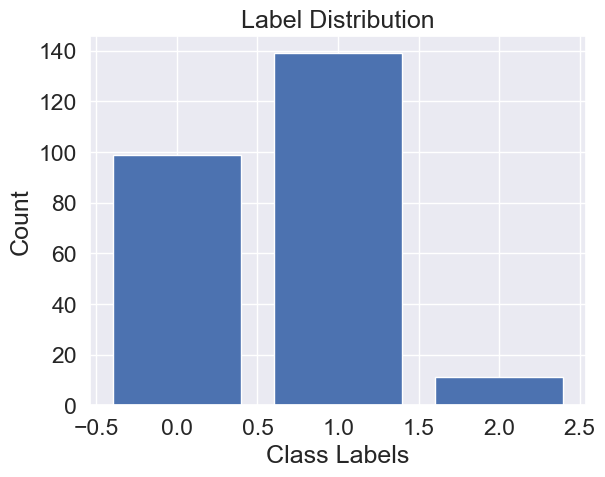

In [51]:
import matplotlib.pyplot as plt
label_counts = y_train.value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()


In [52]:
balance_ratio = label_counts / len(y_train)
print(balance_ratio)


Status
1    0.558233
0    0.397590
2    0.044177
Name: count, dtype: float64


In [53]:
percentages_percent = y_train.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percentages_percent)

Status
1    55.8%
0    39.8%
2     4.4%
Name: proportion, dtype: object


we can see above in the graph and also in percentage in target column 'status' label 2 is only 4.4% in total which is very less so data is imbalance.

#### Scaling

In [54]:
#Standardization cannot be done before the partitioning,as we don't want to fit the StandardScaler on
# some observations that will later be used in the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 2. Based on the pre-processed training data from question 1, create three supervised machine learning (ML) models for predicting “Status”.

#### Gaussian NB

In [55]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
NB_model_ytrain_pred = NB_model.predict(X_train)
NB_model_score = NB_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",NB_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, NB_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, NB_model_ytrain_pred))## classification_report


Training Accuracy :  0.5783132530120482
Confusion matrix
[[45 19 35]
 [ 5 88 46]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       0.90      0.45      0.60        99
           1       0.82      0.63      0.72       139
           2       0.12      1.00      0.21        11

    accuracy                           0.58       249
   macro avg       0.61      0.70      0.51       249
weighted avg       0.82      0.58      0.65       249



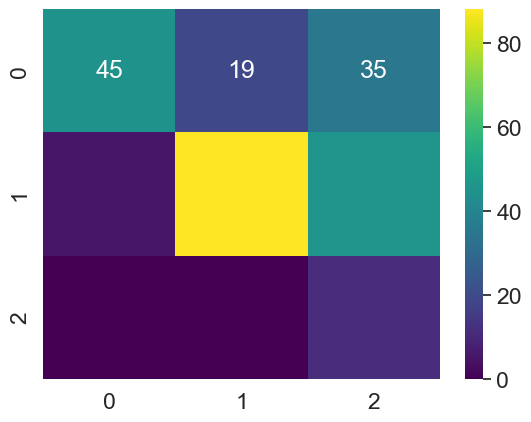

In [57]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, NB_model_ytrain_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [58]:
## Performance Matrix on test data set
NB_model_ytest_pred = NB_model.predict(X_test)
NB_model_score = NB_model.score(X_test, y_test)
print("Testing Accuracy : ",NB_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, NB_model_ytest_pred))
print(metrics.classification_report(y_test, NB_model_ytest_pred))

Testing Accuracy :  0.5555555555555556
Confusion matrix
[[10  6 10]
 [ 2 18  9]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       0.83      0.38      0.53        26
           1       0.72      0.62      0.67        29
           2       0.27      0.88      0.41         8

    accuracy                           0.56        63
   macro avg       0.61      0.63      0.53        63
weighted avg       0.71      0.56      0.58        63



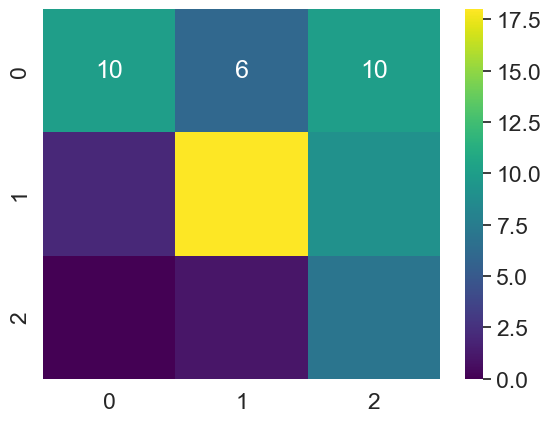

In [59]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, NB_model_ytest_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

#### Gaussian NB Tuned GrCV

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Define the hyperparameter grid
params_NB = {'var_smoothing': np.logspace(0, -9, num=80)}

# Perform grid search with cross-validation
gs_NB = GridSearchCV(estimator=nb,
                     param_grid=params_NB,
                     cv=5,  # Use any cross-validation technique (e.g., 5-fold)
                     verbose=1,
                     scoring='accuracy')  # Choose an appropriate scoring metric

# Fit the model to your data (X_train, y_train)
gs_NB.fit(X_train, y_train)

# Get the best hyperparameters
best_var_smoothing = gs_NB.best_params_['var_smoothing']
print(f"Best var_smoothing: {best_var_smoothing}")


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best var_smoothing: 0.09433732216299778


In [61]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB(var_smoothing=0.094)
NB_model.fit(X_train, y_train)

GaussianNB(var_smoothing=0.094)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
NB_model_ytrain_pred = NB_model.predict(X_train)
NB_model_score = NB_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",NB_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, NB_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, NB_model_ytrain_pred))## classification_report


Training Accuracy :  0.7710843373493976
Confusion matrix
[[ 59  31   9]
 [  9 126   4]
 [  1   3   7]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.70        99
           1       0.79      0.91      0.84       139
           2       0.35      0.64      0.45        11

    accuracy                           0.77       249
   macro avg       0.66      0.71      0.67       249
weighted avg       0.80      0.77      0.77       249



In [63]:
## Performance Matrix on test data set
NB_model_ytest_pred = NB_model.predict(X_test)
NB_model_score = NB_model.score(X_test, y_test)
print("Testing Accuracy : ",NB_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, NB_model_ytest_pred))
print(metrics.classification_report(y_test, NB_model_ytest_pred))

Testing Accuracy :  0.6349206349206349
Confusion matrix
[[15  7  4]
 [ 4 24  1]
 [ 2  5  1]]
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        26
           1       0.67      0.83      0.74        29
           2       0.17      0.12      0.14         8

    accuracy                           0.63        63
   macro avg       0.52      0.51      0.51        63
weighted avg       0.62      0.63      0.62        63



#### One Vs One  Naive Bayes(NB)

In [64]:
from sklearn.multiclass import OneVsOneClassifier
nb_ovo = OneVsOneClassifier(GaussianNB())
nb_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=GaussianNB())

In [65]:
## Performance Matrix on train data set
nb_ovo_ypred_train = nb_ovo.predict(X_train)
nb_ovo_train_score = nb_ovo.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",nb_ovo_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, nb_ovo_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, nb_ovo_ypred_train))## classification_report


Training Accuracy :  0.5783132530120482
Confusion matrix
[[45 19 35]
 [ 5 88 46]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       0.90      0.45      0.60        99
           1       0.82      0.63      0.72       139
           2       0.12      1.00      0.21        11

    accuracy                           0.58       249
   macro avg       0.61      0.70      0.51       249
weighted avg       0.82      0.58      0.65       249



In [66]:
## Performance Matrix on test data set
nb_ovo_ypred_test = nb_ovo.predict(X_test)
nb_ovo_test_score = nb_ovo.score(X_test, y_test)
print("Testing Accuracy : ",nb_ovo_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, nb_ovo_ypred_test))
print(metrics.classification_report(y_test, nb_ovo_ypred_test))

Testing Accuracy :  0.5555555555555556
Confusion matrix
[[10  6 10]
 [ 2 18  9]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       0.83      0.38      0.53        26
           1       0.72      0.62      0.67        29
           2       0.27      0.88      0.41         8

    accuracy                           0.56        63
   macro avg       0.61      0.63      0.53        63
weighted avg       0.71      0.56      0.58        63



By default Naive Bayes classifier have one vs one classifier algorithm

####  One Vs Rest  Naive Bayes (NB)

In [67]:
from sklearn.multiclass import OneVsRestClassifier
nb_ovr = OneVsRestClassifier(GaussianNB())
nb_ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [68]:
## Performance Matrix on train data set
nb_ovr_ypred_train = nb_ovr.predict(X_train)
nb_ovr_train_score = nb_ovr.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",nb_ovr_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, nb_ovr_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, nb_ovr_ypred_train))## classification_report


Training Accuracy :  0.6947791164658634
Confusion matrix
[[ 54  20  25]
 [  8 108  23]
 [  0   0  11]]
              precision    recall  f1-score   support

           0       0.87      0.55      0.67        99
           1       0.84      0.78      0.81       139
           2       0.19      1.00      0.31        11

    accuracy                           0.69       249
   macro avg       0.63      0.77      0.60       249
weighted avg       0.83      0.69      0.73       249



In [69]:
## Performance Matrix on test data set
nb_ovr_ypred_test = nb_ovr.predict(X_test)
nb_ovr_test_score = nb_ovr.score(X_test, y_test)
print("Testing Accuracy : ",nb_ovr_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, nb_ovr_ypred_test))
print(metrics.classification_report(y_test, nb_ovr_ypred_test))

Testing Accuracy :  0.5873015873015873
Confusion matrix
[[13  6  7]
 [ 3 21  5]
 [ 1  4  3]]
              precision    recall  f1-score   support

           0       0.76      0.50      0.60        26
           1       0.68      0.72      0.70        29
           2       0.20      0.38      0.26         8

    accuracy                           0.59        63
   macro avg       0.55      0.53      0.52        63
weighted avg       0.65      0.59      0.60        63



#### Random Forest  Tuned

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=5,max_depth=4)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, n_estimators=5)

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
rf_model_ytrain_pred = rf_model.predict(X_train)
rf_model_score = rf_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",rf_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, rf_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, rf_model_ytrain_pred))## classification_report


Training Accuracy :  0.8634538152610441
Confusion matrix
[[ 79  19   1]
 [  6 133   0]
 [  4   4   3]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        99
           1       0.85      0.96      0.90       139
           2       0.75      0.27      0.40        11

    accuracy                           0.86       249
   macro avg       0.83      0.68      0.71       249
weighted avg       0.86      0.86      0.86       249



In [72]:
## Performance Matrix on test data set
rf_model_ytest_pred = rf_model.predict(X_test)
rf_model_score = rf_model.score(X_test, y_test)
print("Testing Accuracy : ",rf_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, rf_model_ytest_pred))
print(metrics.classification_report(y_test, rf_model_ytest_pred))

Testing Accuracy :  0.6666666666666666
Confusion matrix
[[17  9  0]
 [ 4 25  0]
 [ 4  4  0]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        26
           1       0.66      0.86      0.75        29
           2       0.00      0.00      0.00         8

    accuracy                           0.67        63
   macro avg       0.45      0.51      0.47        63
weighted avg       0.58      0.67      0.62        63



####  One Vs One  RandomForestClassifier

In [73]:
from sklearn.multiclass import OneVsOneClassifier
rf_model_ovo = OneVsOneClassifier(RandomForestClassifier(n_estimators=5,max_depth=4))
rf_model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=RandomForestClassifier(max_depth=4,
                                                    n_estimators=5))

In [74]:
## Performance Matrix on train data set
rf_model_ovo_ypred_train = rf_model_ovo.predict(X_train)
rf_model_ovo_train_score = rf_model_ovo.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",rf_model_ovo_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, rf_model_ovo_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, rf_model_ovo_ypred_train))## classification_report


Training Accuracy :  0.8755020080321285
Confusion matrix
[[ 78  21   0]
 [  5 133   1]
 [  2   2   7]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        99
           1       0.85      0.96      0.90       139
           2       0.88      0.64      0.74        11

    accuracy                           0.88       249
   macro avg       0.88      0.79      0.83       249
weighted avg       0.88      0.88      0.87       249



In [75]:
## Performance Matrix on test data set
rf_model_ovo_ypred_test = rf_model_ovo.predict(X_test)
rf_model_ovo_test_score = rf_model_ovo.score(X_test, y_test)
print("Testing Accuracy : ",rf_model_ovo_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, rf_model_ovo_ypred_test))
print(metrics.classification_report(y_test, rf_model_ovo_ypred_test))

Testing Accuracy :  0.6507936507936508
Confusion matrix
[[17  9  0]
 [ 4 24  1]
 [ 4  4  0]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        26
           1       0.65      0.83      0.73        29
           2       0.00      0.00      0.00         8

    accuracy                           0.65        63
   macro avg       0.44      0.49      0.46        63
weighted avg       0.58      0.65      0.61        63



#### One Vs Rest  RandomForestClassifier

In [76]:
from sklearn.multiclass import OneVsRestClassifier
rf_model_ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators=5,max_depth=4))
rf_model_ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=4,
                                                     n_estimators=5))

In [77]:
## Performance Matrix on train data set
rf_model_ovr_ypred_train = rf_model_ovr.predict(X_train)
rf_model_ovr_train_score = rf_model_ovr.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",rf_model_ovr_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, rf_model_ovr_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, rf_model_ovr_ypred_train))## classification_report


Training Accuracy :  0.8634538152610441
Confusion matrix
[[ 79  20   0]
 [  7 132   0]
 [  3   4   4]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        99
           1       0.85      0.95      0.89       139
           2       1.00      0.36      0.53        11

    accuracy                           0.86       249
   macro avg       0.91      0.70      0.76       249
weighted avg       0.87      0.86      0.86       249



In [78]:
## Performance Matrix on test data set
rf_model_ovr_ypred_test = rf_model_ovr.predict(X_test)
rf_model_ovr_test_score = rf_model_ovr.score(X_test, y_test)
print("Testing Accuracy : ",rf_model_ovr_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, rf_model_ovr_ypred_test))
print(metrics.classification_report(y_test, rf_model_ovr_ypred_test))

Testing Accuracy :  0.6825396825396826
Confusion matrix
[[19  7  0]
 [ 5 24  0]
 [ 4  4  0]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        26
           1       0.69      0.83      0.75        29
           2       0.00      0.00      0.00         8

    accuracy                           0.68        63
   macro avg       0.45      0.52      0.48        63
weighted avg       0.60      0.68      0.64        63



#### Logistic Regression multiclass model

In [79]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial')

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
lr_model_ytrain_pred = lr_model.predict(X_train)
lr_model_score = lr_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",lr_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, lr_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, lr_model_ytrain_pred))## classification_report


Training Accuracy :  0.8192771084337349
Confusion matrix
[[ 76  22   1]
 [ 13 125   1]
 [  5   3   3]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.83      0.90      0.87       139
           2       0.60      0.27      0.37        11

    accuracy                           0.82       249
   macro avg       0.75      0.65      0.68       249
weighted avg       0.81      0.82      0.81       249



In [81]:
## Performance Matrix on test data set
lr_model_ytest_pred = lr_model.predict(X_test)
lr_model_score = lr_model.score(X_test, y_test)
print("Testing Accuracy : ",lr_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, lr_model_ytest_pred))
print(metrics.classification_report(y_test, lr_model_ytest_pred))

Testing Accuracy :  0.7142857142857143
Confusion matrix
[[19  7  0]
 [ 3 26  0]
 [ 2  6  0]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.67      0.90      0.76        29
           2       0.00      0.00      0.00         8

    accuracy                           0.71        63
   macro avg       0.49      0.54      0.51        63
weighted avg       0.63      0.71      0.67        63



#### Tuning GrCV Logistic Regression multiclass model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf = GridSearchCV(log_reg, param_grid, cv=5)  # Use cross-validation (e.g., 5-fold)


In [83]:
clf.fit(X_train, y_train)
best_C = clf.best_params_['C']
# Get the best hyperparameters
print(f"Best C: {best_C}")


Best C: 0.01


In [84]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='newton-cg',C=0.01)
lr_model.fit(X_train, y_train)


LogisticRegression(C=0.01, multi_class='multinomial', solver='newton-cg')

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
lr_model_ytrain_pred = lr_model.predict(X_train)
lr_model_score = lr_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",lr_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, lr_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, lr_model_ytrain_pred))## classification_report


Training Accuracy :  0.7951807228915663
Confusion matrix
[[ 70  29   0]
 [ 11 128   0]
 [  5   6   0]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.79      0.92      0.85       139
           2       0.00      0.00      0.00        11

    accuracy                           0.80       249
   macro avg       0.53      0.54      0.53       249
weighted avg       0.76      0.80      0.77       249



In [86]:
## Performance Matrix on test data set
lr_model_ytest_pred = lr_model.predict(X_test)
lr_model_score = lr_model.score(X_test, y_test)
print("Testing Accuracy : ",lr_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, lr_model_ytest_pred))
print(metrics.classification_report(y_test, lr_model_ytest_pred))

Testing Accuracy :  0.7301587301587301
Confusion matrix
[[19  7  0]
 [ 2 27  0]
 [ 2  6  0]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.68      0.93      0.78        29
           2       0.00      0.00      0.00         8

    accuracy                           0.73        63
   macro avg       0.50      0.55      0.52        63
weighted avg       0.65      0.73      0.68        63



#### Tuned SVM multiclass model

In [87]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
svm_model_ytrain_pred = svm_model.predict(X_train)
svm_model_score = svm_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",svm_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, svm_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, svm_model_ytrain_pred))## classification_report


Training Accuracy :  0.8473895582329317
Confusion matrix
[[ 78  21   0]
 [ 10 128   1]
 [  5   1   5]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.85      0.92      0.89       139
           2       0.83      0.45      0.59        11

    accuracy                           0.85       249
   macro avg       0.84      0.72      0.76       249
weighted avg       0.85      0.85      0.84       249



In [89]:
## Performance Matrix on test data set
svm_model_ytest_pred = svm_model.predict(X_test)
svm_model_score = svm_model.score(X_test, y_test)
print("Testing Accuracy : ",svm_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, svm_model_ytest_pred))
print(metrics.classification_report(y_test, svm_model_ytest_pred))

Testing Accuracy :  0.7142857142857143
Confusion matrix
[[19  7  0]
 [ 3 26  0]
 [ 3  5  0]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.68      0.90      0.78        29
           2       0.00      0.00      0.00         8

    accuracy                           0.71        63
   macro avg       0.48      0.54      0.51        63
weighted avg       0.63      0.71      0.66        63



#### K Neighbors Classifier multiclass model

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
knn_model_ytrain_pred = knn_model.predict(X_train)
knn_model_score = knn_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",knn_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, knn_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, knn_model_ytrain_pred))## classification_report


Training Accuracy :  0.8072289156626506
Confusion matrix
[[ 76  23   0]
 [ 14 125   0]
 [  8   3   0]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        99
           1       0.83      0.90      0.86       139
           2       0.00      0.00      0.00        11

    accuracy                           0.81       249
   macro avg       0.53      0.56      0.54       249
weighted avg       0.77      0.81      0.79       249



In [92]:
## Performance Matrix on test data set
knn_model_ytest_pred = knn_model.predict(X_test)
knn_model_score = knn_model.score(X_test, y_test)
print("Testing Accuracy : ",knn_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, knn_model_ytest_pred))
print(metrics.classification_report(y_test, knn_model_ytest_pred))

Testing Accuracy :  0.7142857142857143
Confusion matrix
[[20  6  0]
 [ 4 25  0]
 [ 1  7  0]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.66      0.86      0.75        29
           2       0.00      0.00      0.00         8

    accuracy                           0.71        63
   macro avg       0.49      0.54      0.51        63
weighted avg       0.63      0.71      0.67        63



#### tuning GrCV K Neighbors Classifier multiclass model

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, param_grid, cv=5)  # Use cross-validation (e.g., 5-fold)


In [94]:
clf_knn.fit(X_train, y_train)
best_params = clf_knn.best_params_


In [95]:
best_params

{'metric': 'manhattan', 'n_neighbors': 5}

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn_model.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan')

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
knn_model_ytrain_pred = knn_model.predict(X_train)
knn_model_score = knn_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",knn_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, knn_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, knn_model_ytrain_pred))## classification_report


Training Accuracy :  0.8072289156626506
Confusion matrix
[[ 74  25   0]
 [ 13 126   0]
 [  5   5   1]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.81      0.91      0.85       139
           2       1.00      0.09      0.17        11

    accuracy                           0.81       249
   macro avg       0.87      0.58      0.60       249
weighted avg       0.81      0.81      0.79       249



In [98]:
## Performance Matrix on test data set
knn_model_ytest_pred = knn_model.predict(X_test)
knn_model_score = knn_model.score(X_test, y_test)
print("Testing Accuracy : ",knn_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, knn_model_ytest_pred))
print(metrics.classification_report(y_test, knn_model_ytest_pred))

Testing Accuracy :  0.6666666666666666
Confusion matrix
[[16 10  0]
 [ 3 26  0]
 [ 1  7  0]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        26
           1       0.60      0.90      0.72        29
           2       0.00      0.00      0.00         8

    accuracy                           0.67        63
   macro avg       0.47      0.50      0.47        63
weighted avg       0.61      0.67      0.62        63



#### tuned XGBClassifier multiclass model

In [99]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=5, learning_rate=0.1)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
xgb_model_ytrain_pred = xgb_model.predict(X_train)
xgb_model_score = xgb_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",xgb_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, xgb_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, xgb_model_ytrain_pred))## classification_report


Training Accuracy :  0.9598393574297188
Confusion matrix
[[ 93   6   0]
 [  1 138   0]
 [  1   2   8]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        99
           1       0.95      0.99      0.97       139
           2       1.00      0.73      0.84        11

    accuracy                           0.96       249
   macro avg       0.97      0.89      0.92       249
weighted avg       0.96      0.96      0.96       249



In [101]:
## Performance Matrix on test data set
xgb_model_ytest_pred = xgb_model.predict(X_test)
xgb_model_score = xgb_model.score(X_test, y_test)
print("Testing Accuracy : ",xgb_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, xgb_model_ytest_pred))
print(metrics.classification_report(y_test, xgb_model_ytest_pred))

Testing Accuracy :  0.6666666666666666
Confusion matrix
[[18  8  0]
 [ 5 24  0]
 [ 3  5  0]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        26
           1       0.65      0.83      0.73        29
           2       0.00      0.00      0.00         8

    accuracy                           0.67        63
   macro avg       0.45      0.51      0.47        63
weighted avg       0.58      0.67      0.62        63



#### tuned DecisionTreeClassifier

In [102]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
DT_model.fit(X_train, y_train)

 

DecisionTreeClassifier(max_depth=5, random_state=42)

In [103]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9076305220883534
[[ 89  10   0]
 [  6 133   0]
 [  2   5   4]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        99
           1       0.90      0.96      0.93       139
           2       1.00      0.36      0.53        11

    accuracy                           0.91       249
   macro avg       0.94      0.74      0.79       249
weighted avg       0.91      0.91      0.90       249



In [104]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6666666666666666
[[16  9  1]
 [ 4 25  0]
 [ 2  5  1]]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        26
           1       0.64      0.86      0.74        29
           2       0.50      0.12      0.20         8

    accuracy                           0.67        63
   macro avg       0.62      0.53      0.53        63
weighted avg       0.66      0.67      0.64        63



### a. Use an appropriate validation method, report performance score using a suitable metric. Is it possible that the presented result is an under-fitted or over-fitted one? Justify.  


In [105]:
metrics = {'model_name': ['Gaussian NB','Gaussian NB Tuned GrCV','One Vs One NB','One Vs Rest NB',
                          'Random Forest Tuned','One Vs One Random Forest Classifier','One Vs Rest RandomForestClassifier','Logistic Regression multiclass model',
                          'Tuning GrCV Logistic Regression multiclass model','Tuned SVM multiclass model','K Neighbors Classifier multiclass model',
                          'tuning GrCV K Neighbors Classifier multiclass model','tuned XGBClassifier multiclass model','tuned DecisionTreeClassifier'],
    'Training Accuracy':['57.8','77.2','57.8','69.5','85.9','84.4','87.55','81.92','79.51','84.73','80.72','80.72','95.98','90.76'],
    'Testing Accuracy':['55.6','63.5','55.6','58.8','65.1','61.9','68.25','71.42','73.01','71.42','71.42','66.66','66.66','66.66']}


In [106]:
All_models = pd.DataFrame(metrics)
All_models.sort_values(by='Testing Accuracy')

,model_name,Training Accuracy,Testing Accuracy
0,Gaussian NB,57.8,55.6
2,One Vs One NB,57.8,55.6
3,One Vs Rest NB,69.5,58.8
5,One Vs One Random Forest Classifier,84.4,61.9
1,Gaussian NB Tuned GrCV,77.2,63.5
4,Random Forest Tuned,85.9,65.1
11,tuning GrCV K Neighbors Classifier multiclass ...,80.72,66.66
12,tuned XGBClassifier multiclass model,95.98,66.66
13,tuned DecisionTreeClassifier,90.76,66.66
6,One Vs Rest RandomForestClassifier,87.55,68.25


see above this metric report is sorted based on testing accuracy in a ascending order.


we can see train and test accuracy is less in all base models.


we have small dataset.


we have also seen in our dataset target column 3 classes are imbalanced.


so because we have poor performance in all base models so we can say its a under fitting condition.


if we will increase number of records then it may perform well.

### b. Justify different design decisions for each ML model used to answer this question.

 My 3 Models are: 

1. Multinomial Logistic Regression


2. K Nearest Neighbors

3. support vector classifier

**Multinomial Logistic Regression:**

**Model Type:** Multinomial logistic regression is a parametric model that estimates probabilities for multiple classes simultaneously.

**Decision Boundary:** It creates linear decision boundaries in the feature space. The decision boundary is a hyperplane.

**Output:** The output is the probability distribution over all classes. It uses the softmax function to convert raw scores into probabilities.

**Interpretability:** Coefficients represent the impact of each feature on the log-odds of class membership.

**Assumptions:** Assumes a linear relationship between features and log-odds.

**Regularization:** Can apply L1 or L2 regularization to prevent overfitting.

**Scalability:** Efficient for large datasets.

**Pros:** Simplicity, interpretable coefficients.

**Cons:** Assumes linearity, may not handle complex interactions well.

**K Nearest Neighbors (KNN

**Model Type:** Non-parametric instance-based model.

**Decision Boundary:** No explicit decision boundary; classification based on majority vote of nearest neighbors.

**Output:** Class label assigned based on the majority class among K nearest neighbors.

**Distance Metric:** Relies on distance (e.g., Euclidean) to find neighbors.

**Hyperparameter:** K (number of neighbors) impacts bias-variance trade-off.

**Pros:** Simple, adapts to local data patterns.

**Cons:** Sensitive to noise, computationally expensive during prediction.

**Scalability:** Slower for large datasets.


**Support Vector Classifier (SVC):**

**Model Type:** Parametric model based on support vectors.

**Decision Boundary:** Finds the hyperplane that maximizes the margin between classes.

**Kernel Trick:** Can use different kernels (linear, polynomial, RBF) to handle non-linear data.

**Margin:** Focuses on maximizing the margin around the decision boundary.

**Hyperparameters:** C (regularization), kernel parameters (e.g., gamma).

**Pros:** Effective in high-dimensional spaces, handles non-linear data.

**Cons:** Sensitive to kernel choice, memory-intensive during training.

**Scalability:** Slower for large datasets.

### c. Have you optimized any hyper-parameters for each ML model? What are they? Why have you done that? Explain.

**Multinomial Logistic Regression:**

**Hyperparameters:**

**Regularization Strength ©:** This hyperparameter controls the trade-off between fitting the training data well and preventing overfitting. A smaller C increases regularization, while a larger C reduces it.

**Solver:** The choice of solver (e.g., ‘lbfgs’, ‘saga’, ‘newton-cg’) affects the optimization algorithm used to find the coefficients.

**Why Optimize?:** We optimize these hyperparameters to find the best balance between model complexity and generalization performance. Regularization helps prevent overfitting, and the choice of solver impacts convergence speed.

**K Nearest Neighbors (KNN):**

**Hyperparameters:**

**K (Number of Neighbors):** We optimize K to find the optimal balance between bias and variance. A small K may lead to overfitting, while a large K may smooth decision boundaries too much.

**Distance Metric:** The choice of distance metric (e.g., Euclidean, Manhattan) affects how neighbors are weighted.

**Why Optimize?:** Optimizing K ensures that the model adapts well to local patterns in the data. The distance metric impacts how KNN measures similarity.

well here i did not optimize this model because it has almost good i tried little bit but its base parameters are giving much better accuracy. here i did not applied grid search CV

**Support Vector Classifier (SVC):**

**Hyperparameters:**

**C (Regularization Parameter):** Similar to logistic regression, C controls the trade-off between fitting the training data and regularization. A smaller C increases regularization, while a larger C reduces it.

**Kernel Parameters:** For non-linear kernels (e.g., RBF), we optimize kernel-specific parameters (e.g., gamma).

**Why Optimize?:** Properly tuning C balances the margin width and classification accuracy. Optimizing kernel parameters ensures the best fit for non-linear data.

well i just changed here kernel as a linear.

### d. Use a method to deal with the label imbalance issue and indicate whether there is a model improvement after you balance the dataset.

#### SMOTE

In [107]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming you have features X and labels y
smote = SMOTE(sampling_strategy='minority')  # You can adjust the sampling strategy as needed
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Class distribution after SMOTE:", Counter(y_train_res))


Class distribution after SMOTE: Counter({1: 139, 2: 139, 0: 99})


##### GaussianNB with smote

In [108]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train_res, y_train_res)

GaussianNB()

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
NB_model_ytrain_pred = NB_model.predict(X_train_res)
NB_model_score = NB_model.score(X_train_res, y_train_res) ## Accuracy
print("Training Accuracy : ",NB_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train_res, NB_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train_res, NB_model_ytrain_pred))## classification_report


Training Accuracy :  0.7400530503978779
Confusion matrix
[[ 49  20  30]
 [  7  91  41]
 [  0   0 139]]
              precision    recall  f1-score   support

           0       0.88      0.49      0.63        99
           1       0.82      0.65      0.73       139
           2       0.66      1.00      0.80       139

    accuracy                           0.74       377
   macro avg       0.79      0.72      0.72       377
weighted avg       0.78      0.74      0.73       377



##### LogisticRegression with smote

In [110]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train_res, y_train_res)


LogisticRegression(multi_class='multinomial')

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
lr_model_ytrain_pred = lr_model.predict(X_train_res)
lr_model_score = lr_model.score(X_train_res, y_train_res) ## Accuracy
print("Training Accuracy : ",lr_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train_res, lr_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train_res, lr_model_ytrain_pred))## classification_report


Training Accuracy :  0.8514588859416445
Confusion matrix
[[ 65  20  14]
 [ 13 117   9]
 [  0   0 139]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        99
           1       0.85      0.84      0.85       139
           2       0.86      1.00      0.92       139

    accuracy                           0.85       377
   macro avg       0.85      0.83      0.84       377
weighted avg       0.85      0.85      0.85       377



##### KNeighborsClassifier with smote

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_res, y_train_res)


KNeighborsClassifier()

In [113]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
knn_model_ytrain_pred = knn_model.predict(X_train_res)
knn_model_score = knn_model.score(X_train_res, y_train_res) ## Accuracy
print("Training Accuracy : ",knn_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train_res, knn_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train_res, knn_model_ytrain_pred))## classification_report


Training Accuracy :  0.8328912466843501
Confusion matrix
[[ 59  22  18]
 [ 10 116  13]
 [  0   0 139]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.70        99
           1       0.84      0.83      0.84       139
           2       0.82      1.00      0.90       139

    accuracy                           0.83       377
   macro avg       0.84      0.81      0.81       377
weighted avg       0.84      0.83      0.82       377



##### SVM with smote

In [114]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_res, y_train_res)


SVC(kernel='linear')

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
svm_model_ytrain_pred = svm_model.predict(X_train_res)
svm_model_score = svm_model.score(X_train_res, y_train_res) ## Accuracy
print("Training Accuracy : ",svm_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train_res, svm_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train_res, svm_model_ytrain_pred))## classification_report


Training Accuracy :  0.8859416445623343
Confusion matrix
[[ 71  20   8]
 [ 10 124   5]
 [  0   0 139]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        99
           1       0.86      0.89      0.88       139
           2       0.91      1.00      0.96       139

    accuracy                           0.89       377
   macro avg       0.88      0.87      0.87       377
weighted avg       0.88      0.89      0.88       377



we cant apply smote on test data so i applied it on training data on above four models and every model accuracy has some increase.

so yes we can say after applying some imbalance technique model performance increases.

### e. Finally, make a model recommendation based on the reported results and justify it.

i will recommend Multinomial Logistic regression model after grid serach cv.


we can see in a model metrics on training accuracy has 79% and testing accuracy has 73% it has not much difference it has only 6% difference.


so it is more reliable than other models. 

## 3. Use the best model that you get from question 2, do prediction on the pre-processed test set and report the model performance.


my best model is below which is Tuned GrCV Logistic Regression multiclass model

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf = GridSearchCV(log_reg, param_grid, cv=5)  # Use cross-validation (e.g., 5-fold)


In [117]:
clf.fit(X_train, y_train)
best_C = clf.best_params_['C']
# Get the best hyperparameters
print(f"Best C: {best_C}")


Best C: 0.01


In [118]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='newton-cg',C=0.01)
lr_model.fit(X_train, y_train)


LogisticRegression(C=0.01, multi_class='multinomial', solver='newton-cg')

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Performance Matrix on train data set
lr_model_ytrain_pred = lr_model.predict(X_train)
lr_model_score = lr_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",lr_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, lr_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, lr_model_ytrain_pred))## classification_report


Training Accuracy :  0.7951807228915663
Confusion matrix
[[ 70  29   0]
 [ 11 128   0]
 [  5   6   0]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.79      0.92      0.85       139
           2       0.00      0.00      0.00        11

    accuracy                           0.80       249
   macro avg       0.53      0.54      0.53       249
weighted avg       0.76      0.80      0.77       249



In [120]:
## Performance Matrix on test data set
lr_model_ytest_pred = lr_model.predict(X_test)
lr_model_score = lr_model.score(X_test, y_test)
print("Testing Accuracy : ",lr_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, lr_model_ytest_pred))
print(metrics.classification_report(y_test, lr_model_ytest_pred))

Testing Accuracy :  0.7301587301587301
Confusion matrix
[[19  7  0]
 [ 2 27  0]
 [ 2  6  0]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.68      0.93      0.78        29
           2       0.00      0.00      0.00         8

    accuracy                           0.73        63
   macro avg       0.50      0.55      0.52        63
weighted avg       0.65      0.73      0.68        63



## 4. Analyse the importance of the features for predicting “Status” using two different approaches. Give statistical reasons for your findings.

###  feature importance statistical 

In [121]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


# Train an ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_


# Print feature importance scores for each feature
for i, v in enumerate(feature_importances):
    print(f'Feature[{i}]: {X.columns[i]}, Score: {v:.6f}')

# Select relevant features
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print()
print(f"Original feature shape: {X.shape}")
print(f"Selected feature shape: {X_new.shape}")

Feature[0]: N_Days, Score: 0.081802
Feature[1]: Drug, Score: 0.023730
Feature[2]: Age, Score: 0.051191
Feature[3]: Sex, Score: 0.051184
Feature[4]: Ascites, Score: 0.045428
Feature[5]: Hepatomegaly, Score: 0.045871
Feature[6]: Spiders, Score: 0.021801
Feature[7]: Edema, Score: 0.033803
Feature[8]: Bilirubin, Score: 0.130933
Feature[9]: Cholesterol, Score: 0.056856
Feature[10]: Albumin, Score: 0.056408
Feature[11]: Copper, Score: 0.083685
Feature[12]: Alk_Phos, Score: 0.053157
Feature[13]: SGOT, Score: 0.054841
Feature[14]: Tryglicerides, Score: 0.046833
Feature[15]: Platelets, Score: 0.039610
Feature[16]: Prothrombin, Score: 0.087128
Feature[17]: Stage, Score: 0.035738

Original feature shape: (312, 18)
Selected feature shape: (312, 6)


In [122]:
X_new

array([[400.0, 7.3625, 261.0, 2.6, 156.0, 12.2],
       [4500.0, 1.1, 302.0, 4.14, 54.0, 10.6],
       [1012.0, 1.4, 176.0, 3.48, 210.0, 12.0],
       ...,
       [939.0, 1.7, 434.0, 3.35, 39.0, 10.2],
       [839.0, 2.0, 247.0, 3.16, 69.0, 10.5],
       [788.0, 6.4, 576.0, 3.79, 186.0, 10.8]], dtype=object)

### Decision Tree Classifier for feature importance

In [123]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
DT_model.fit(X_train, y_train)

 

DecisionTreeClassifier(max_depth=5, random_state=42)

In [124]:
DT_model.feature_importances_

array([0.41953755, 0.        , 0.02758805, 0.04423021, 0.        ,
       0.        , 0.        , 0.        , 0.09506533, 0.08030299,
       0.        , 0.03497403, 0.10924868, 0.01840268, 0.04269997,
       0.03373825, 0.0754688 , 0.01874347])

Feature[0]: N_Days, Score: 0.419538
Feature[1]: Drug, Score: 0.000000
Feature[2]: Age, Score: 0.027588
Feature[3]: Sex, Score: 0.044230
Feature[4]: Ascites, Score: 0.000000
Feature[5]: Hepatomegaly, Score: 0.000000
Feature[6]: Spiders, Score: 0.000000
Feature[7]: Edema, Score: 0.000000
Feature[8]: Bilirubin, Score: 0.095065
Feature[9]: Cholesterol, Score: 0.080303
Feature[10]: Albumin, Score: 0.000000
Feature[11]: Copper, Score: 0.034974
Feature[12]: Alk_Phos, Score: 0.109249
Feature[13]: SGOT, Score: 0.018403
Feature[14]: Tryglicerides, Score: 0.042700
Feature[15]: Platelets, Score: 0.033738
Feature[16]: Prothrombin, Score: 0.075469
Feature[17]: Stage, Score: 0.018743


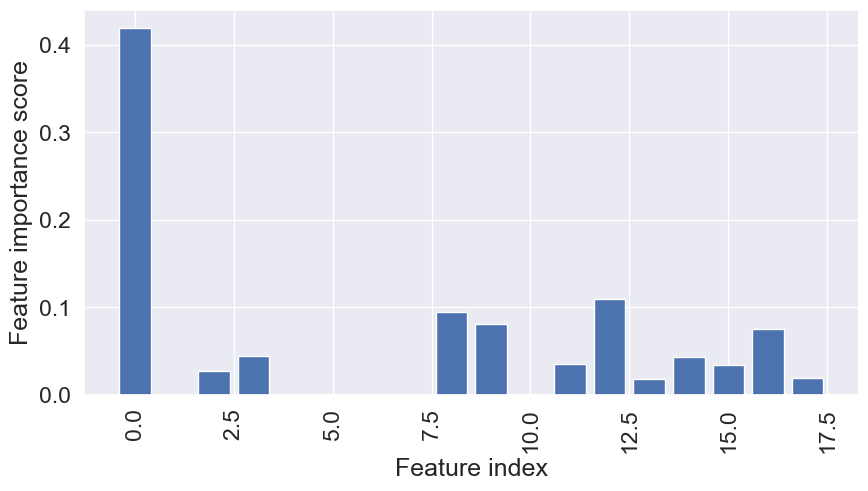

In [125]:

# Get feature importances
importance = DT_model.feature_importances_

# Print feature importance scores for each feature
for i, v in enumerate(importance):
    print(f'Feature[{i}]: {X.columns[i]}, Score: {v:.6f}')

# Visualize feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature index')
plt.ylabel('Feature importance score')
plt.xticks(rotation=90)
plt.show()


important features are: N_Days,Bilirubin,Cholesterol,Alk_Phos,Tryglicerides,Prothrombin only these 6 features can explain about 80% of data

In [5]:
!pip install xelatex notebook.tex

ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex
